1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import fftpack
from scipy.integrate import quad, quadrature, nquad, odeint
import math
from matplotlib.colors import LogNorm

Probability to see more than 15 hurricane in a year is 0.0022171
Z = 2.2463


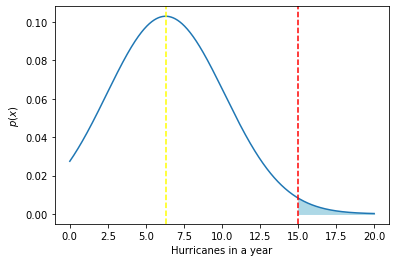

In [14]:
x0 = 15
mu = 6.3
sigma = np.sqrt(15)

#number of hurricanes in follows the Poisson Distribution 
cumulative = 0
for i in range(x0):
    cumulative = cumulative + np.exp(-mu)*(mu**i) / np.math.factorial(i)
    
print("Probability to see more than 15 hurricane in a year is {:.5}".format(1-cumulative))   
z = abs(x0-mu)/sigma
print ("Z = {:.5}".format(z))

# plot
w = mu - x0
x = np.linspace(0, 20, 1000)
y = stats.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, y)
plt.fill_between(x, y, where=(x>x0), color='lightblue')
plt.axvline(x0, linestyle = '--', color='red')
plt.axvline(mu,linestyle = '--', color='yellow')
plt.ylabel("$p(x)$")
plt.xlabel("Hurricanes in a year")
plt.show()


P-value = 0.024683


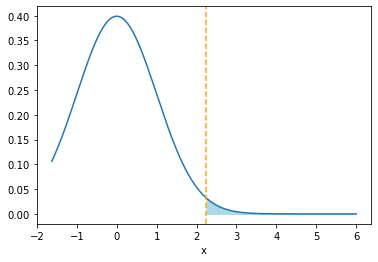

In [15]:
#plot test statistics and its pdf
xs = np.linspace((0-mu)/sigma,+6, 1000) #negative values are not allowed
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where = np.abs(xs)>np.abs(Z), color = 'lightblue')
plt.axvline(Z, linestyle = '--', color = 'orange')
plt.ylabel('')
plt.xlabel('x')
plt.show

#calculate p-value as left tail + right tail
pvalue = stats.norm.cdf(-Z) +(1. - stats.norm.cdf(Z))
print('P-value = {:.5}'.format(pvalue))

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = 3.786997938137629


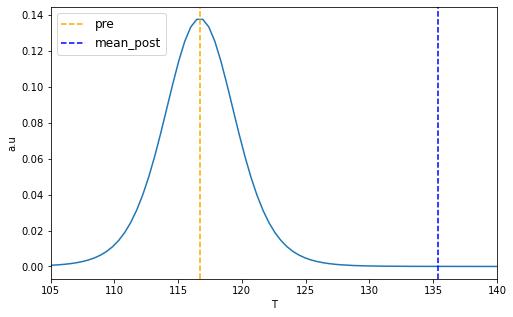

In [16]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

#variances
sigma_pre = np.sqrt(np.var(pre, ddof=1))
sigma_post = np.sqrt(np.var(post, ddof=1))
#means
mean_pre = np.mean(pre)
mean_post = np.mean(post)

n = len(pre)
sigma = np.sqrt(0.5 * (sigma_pre**2 + sigma_post**2))
T = np.abs((mean_pre - mean_post) / (sigma * np.sqrt(2/n)))
print('T = {}'.format(T))

#T student distribution
x = np.linspace(mean_pre-mean_post-100, mean_pre+mean_post+100, 1000)
y = stats.t.pdf(x, loc=pre.mean(), scale=pre.std() / np.sqrt(n), df=n-1)
fig,ax = plt.subplots(1,1, figsize = (8,5))

ax.plot(x,y)
ax.axvline(mean_pre, linestyle = '--', color = 'orange', label = 'pre')
ax.axvline(mean_post, linestyle = '--', color = 'blue', label = 'mean_post')
ax.set_xlabel('T')
ax.set_ylabel('a.u')
ax.set_xlim(105,140)
ax.legend(loc='upper left', fontsize=12)
plt.show()


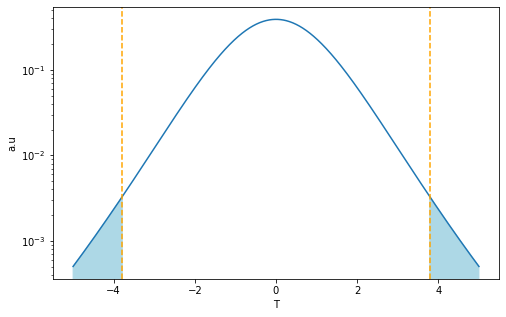

p-value = 1.9957


In [17]:
#test statistics 
xs = np.linspace(-5, 5, 1000)
ts = stats.t.pdf(xs, len(pre)-1) #n-1

fig, ax = plt.subplots(1,1, figsize = (8,5))

ax.plot(xs, ts)
ax.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color = 'lightblue')
ax.axvline(T, linestyle = '--', color = 'orange')
ax.axvline(-T, linestyle = '--', color = 'orange')

ax.set_xlabel('T')
ax.set_ylabel('a.u')
ax.set_yscale('log')
plt.show()

#p-value
pvalue = stats.t.cdf(T, n-1) + (1. -stats.t.cdf(-T, n-1))
print('p-value = {:.5}'.format(pvalue))

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

In [18]:
#COLLECT DATA
data = np.loadtxt('populations.txt')
year, hares, lynxes, carrots = data.T

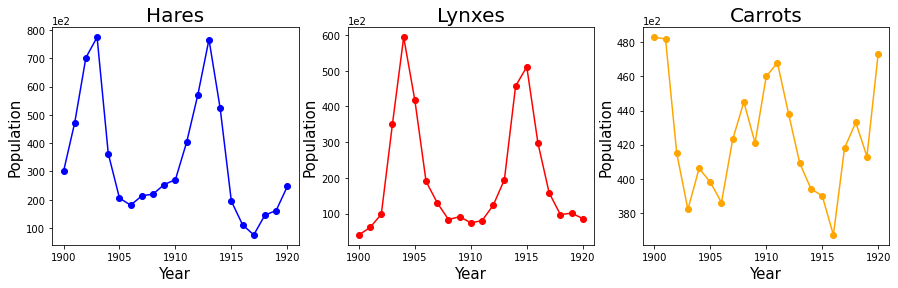

In [23]:
#POPULATION PLOTS

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize = (15, 4))
x = year

ax1.plot(x, hares, marker = 'o', color = 'blue')
ax2.plot(x, lynxes, marker = 'o', color = 'red')
ax3.plot(x, carrots, marker = 'o', color = 'orange')
ax1.set_title('Hares', fontsize=20)
ax2.set_title('Lynxes', fontsize=20)
ax3.set_title('Carrots', fontsize=20)
for ax in fig.get_axes():
    ax.set_xlabel('Year', fontsize = 15)
    ax.set_ylabel('Population', fontsize = 15)
    ax.ticklabel_format(axis='y', scilimits=(2,2))

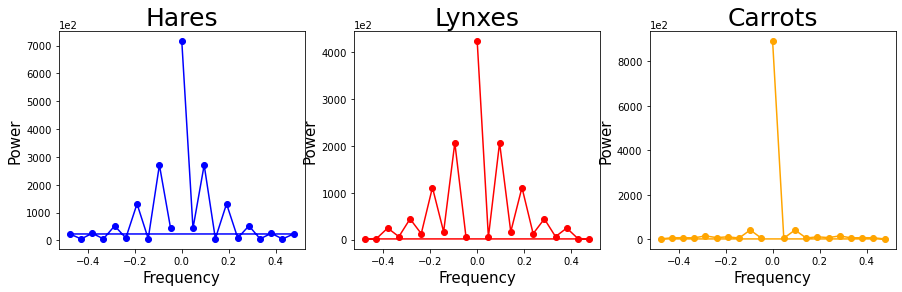

In [20]:
#FREQUENCIES PLOT

#hares
hares_fft = fftpack.fft(hares) 
h_pow = np.abs(hares_fft)
h_pow = np.abs(hares_fft)
h_freq = fftpack.fftfreq(hares.size, d=time_step)
h_pos_mask = np.where(h_freq > 0)
h_freqs = h_freq[h_pos_mask]
h_peak_freq = h_freqs[h_pow[h_pos_mask].argmax()]

#lynxes
lynxes_fft = fftpack.fft(lynxes)
l_pow = np.abs(lynxes_fft)
l_freq = fftpack.fftfreq(lynxes.size, d=time_step)
l_pos_mask = np.where(l_freq > 0)
l_freqs = l_freq[l_pos_mask]
l_peak_freq = l_freqs[l_pow[l_pos_mask].argmax()]

#carrots
carrots_fft = fftpack.fft(carrots)
c_pow = np.abs(carrots_fft) 
c_freq = fftpack.fftfreq(carrots.size, d=time_step)
c_pos_mask = np.where(c_freq > 0)
c_freqs = c_freq[c_pos_mask]
c_peak_freq = c_freqs[c_pow[c_pos_mask].argmax()]

fig,((ax1,ax2,ax3)) = plt.subplots(1,3,figsize=(15,4))

#plots
ax1.set_title('Hares', fontsize=25)
ax1.plot(h_freq,h_pow, label='Hares', marker = 'o', color = 'blue')
ax2.set_title('Lynxes', fontsize=25)
ax2.plot(l_freq,l_pow, label='Lynxes', marker = 'o', color = 'red')
ax3.set_title('Carrots', fontsize=25)
ax3.plot(c_freq,c_pow, label='Carrots', marker = 'o', color = 'orange')

for ax in fig.get_axes():
    ax.set_xlabel('Frequency', fontsize = 15)
    ax.set_ylabel('Power', fontsize = 15)
    ax.ticklabel_format(axis='y', scilimits=(2,2))
    
plt.show()

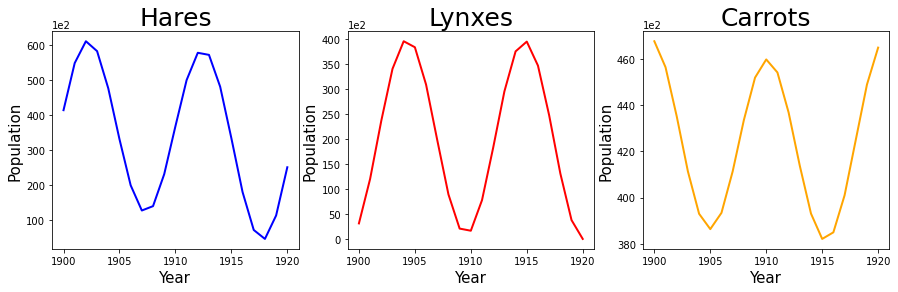

In [21]:
#hares
h_high_freq_fft = hares_fft.copy()
h_high_freq_fft[np.abs(h_freq) > h_peak_freq] = 0
h_filtered_sig = fftpack.ifft(h_high_freq_fft)
h_real = np.real(h_filtered_sig )
#lynxes
l_high_freq_fft = lynxes_fft.copy()
l_high_freq_fft[np.abs(l_freq) > l_peak_freq] = 0
l_filtered_sig = fftpack.ifft(l_high_freq_fft)
l_real = np.real(l_filtered_sig )
#carrots
c_high_freq_fft = carrots_fft.copy()
c_high_freq_fft[np.abs(c_freq) > c_peak_freq] = 0
c_filtered_sig = fftpack.ifft(c_high_freq_fft)
c_real = np.real(c_filtered_sig )

fig,((ax1,ax2,ax3)) = plt.subplots(1,3,figsize=(15,4))

#plots
ax1.set_title('Hares', fontsize=25)
ax1.plot(year, h_real, label='Filtered data', lw = 2, color = 'blue')
ax2.set_title('Lynxes', fontsize=25)
ax2.plot(year, l_real, label='Filtered data', lw = 2, color = 'red')
ax3.set_title('Carrots', fontsize=25)
ax3.plot(year, c_real, label='Filtered data', lw = 2, color = 'orange')

for ax in fig.get_axes():
    ax.set_xlabel('Year', fontsize = 15)
    ax.set_ylabel('Population', fontsize = 15)
    ax.ticklabel_format(axis='y', scilimits=(2,2))
    
plt.show()

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

Text(0.5, 1.0, 'Moonlanding.png')

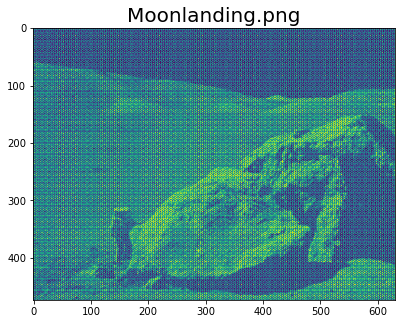

In [9]:
#collect data
im = plt.imread('moonlanding.png').astype(float)
plt.figure(figsize=(15,5))
plt.imshow(im)
plt.title('Moonlanding.png', fontsize=20)

There is periodic noise where the spectrum presents high frequencies



Text(0.5, 1.0, 'Final Image')

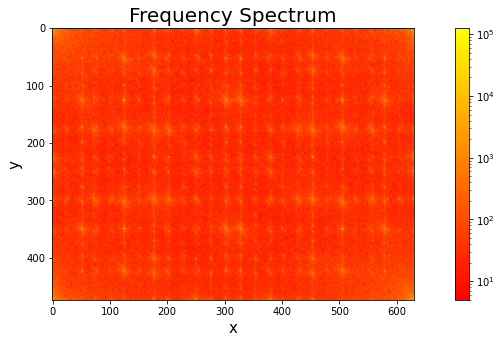

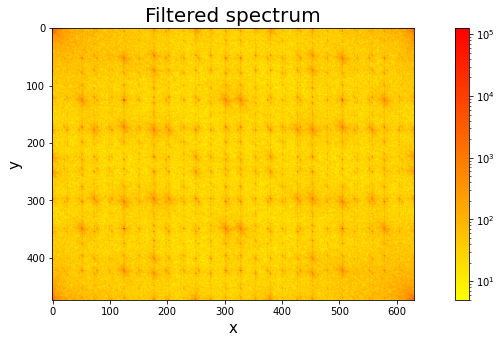

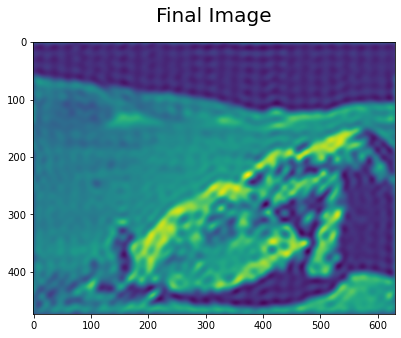

In [10]:
#FREQUENCY SPECTRUM

fft_im = fftpack.fft2(im)
fft_im2 = fft_im.copy()
plt.figure(figsize=(15,5))
img = plt.imshow(np.abs(fft_im2), norm = LogNorm(vmin=5), cmap = 'autumn')
#plot
plt.colorbar(img, fraction=0.05)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.title('Frequency Spectrum', fontsize=20)

#FILTERED SPECTRUM

print("There is periodic noise where the spectrum presents high frequencies\n")
cut = 0.05 #varying this parameter I'll get an image with more or less noise
r,c = fft_im2.shape #array slicing

fft_im2[int(r*cut) : int(r*(1-cut))] = 0
fft_im2[:, int(c*cut):int(c*(1-cut))] = 0 
#cutted the high frequencies

plt.figure(figsize=(15,5))
img2 = plt.imshow(np.abs(fft_im), norm=LogNorm(vmin=5), cmap='autumn_r')
plt.colorbar(img2, fraction=0.05)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.title('Filtered spectrum', fontsize=20)

#RECONSTRUCT IMAGE

#inverse Fourier Transform
filtered_sig = fftpack.ifft2(fft_im2)
real_filtered_signal = np.real(filtered_sig)
#method imshow wants only the real part 
plt.figure(figsize=(15,5))
plt.imshow(real_filtered_signal)
plt.title('Final Image',fontsize=20, pad = 20)